In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 10)

# Input data files are available in the read-only "../dataset/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Bad key "text.kerning_factor" on line 4 in
C:\Users\Zeus\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


dataset\test.csv
dataset\train.csv
dataset\train_data_dict.csv


In [2]:
train_data=pd.read_csv('dataset/train.csv', header=0)
test_data=pd.read_csv('dataset/test.csv', header=0)

In [3]:
train_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
test_data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,318439,21,c,3,Z,3,gynecology,S,A,2.0,17006,2.0,Emergency,Moderate,2,71-80,3095.0
1,318440,29,a,4,X,2,gynecology,S,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4018.0
2,318441,26,b,2,Y,3,gynecology,Q,D,4.0,17006,2.0,Emergency,Moderate,3,71-80,4492.0
3,318442,6,a,6,X,3,gynecology,Q,F,2.0,17006,2.0,Trauma,Moderate,3,71-80,4173.0
4,318443,28,b,11,X,2,gynecology,R,F,2.0,17006,2.0,Trauma,Moderate,4,71-80,4161.0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

# Import the relevat modules

In [6]:
# Standard ML Models for comparison

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy


In [7]:
train_data.describe()

,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Visitors with Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [37]:


train_data['Bed Grade'].fillna(-999, inplace = True) 
test_data['Bed Grade'].fillna(-999, inplace = True) 


train_data['City_Code_Patient'].fillna(-999., inplace = True) 
test_data['City_Code_Patient'].fillna(-999., inplace = True) 


print(train_data['City_Code_Patient'].unique())


train_data['Bed Grade'].unique() 

[   7.    8.    2.    5.    6.    3.    4.    1.    9.   14. -999.   25.
   15.   12.   10.   28.   24.   23.   20.   11.   13.   21.   18.   16.
   26.   27.   22.   19.   31.   34.   32.   30.   29.   37.   33.   35.
   36.   38.]


array([2., 3., 4., 1., 0.])

In [38]:
train_data.isnull()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318435,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
318436,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Create the Correlation Graph 

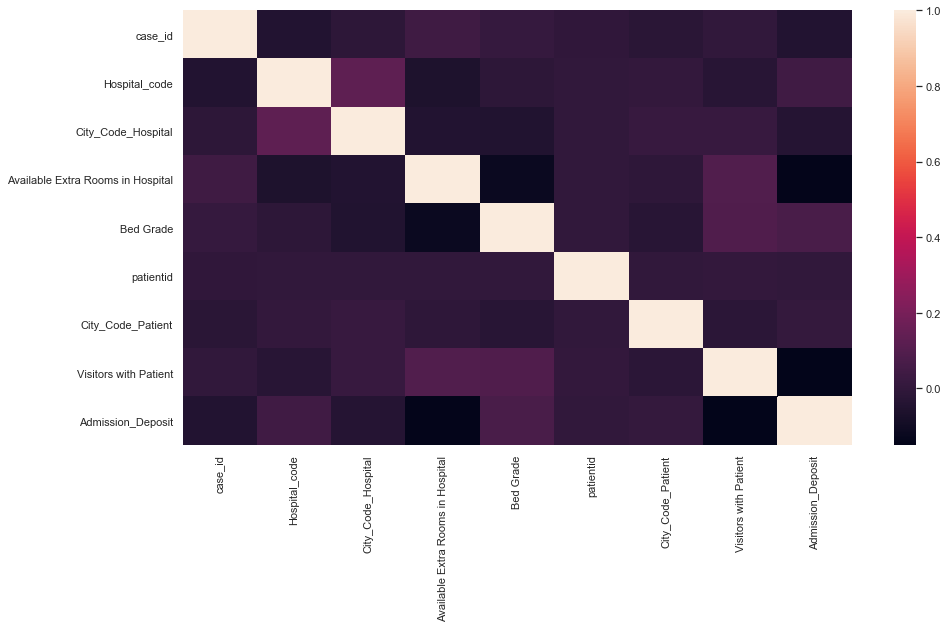

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr())

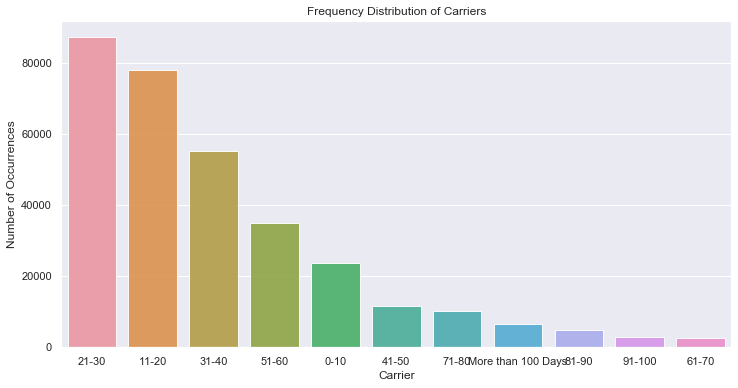

<Figure size 1440x576 with 0 Axes>

In [40]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

# Dealing with Categorical Data

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

# Creating a Base Line Model

In [42]:
from sklearn.preprocessing import LabelEncoder

cat_features = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
                    'Severity of Illness','Age','Stay']

cat_features_test = ['Hospital_type_code','Hospital_region_code','Department','Ward_Type','Ward_Facility_Code','Type of Admission',
                    'Severity of Illness','Age']
encoder = LabelEncoder()

# Apply the label encoder to each column
train_data_transform = train_data[cat_features].apply(encoder.fit_transform)
test_data_transform = test_data[cat_features_test].apply(encoder.fit_transform)

In [43]:
# ['case_id', 'Hospital_code', 'City_Code_Hospital',
#        'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'Visitors with Patient', 'Admission_Deposit',
#        'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
#        'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness','City_Code_Patient',
#        'Age','Stay']

train_data_transformed=train_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(train_data_transform)

test_data_transformed=test_data[['case_id','Hospital_code','City_Code_Hospital','Available Extra Rooms in Hospital','Bed Grade',
                                   'patientid','City_Code_Patient','Visitors with Patient','Admission_Deposit']].join(test_data_transform)

train_data_transformed=train_data_transformed[['case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'Visitors with Patient', 'Admission_Deposit',
       'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type','City_Code_Patient',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age','Stay']]


test_data_transformed=test_data_transformed[[ 'case_id', 'Hospital_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Bed Grade', 'patientid', 'Visitors with Patient', 'Admission_Deposit',
       'Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type','City_Code_Patient',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Age']]

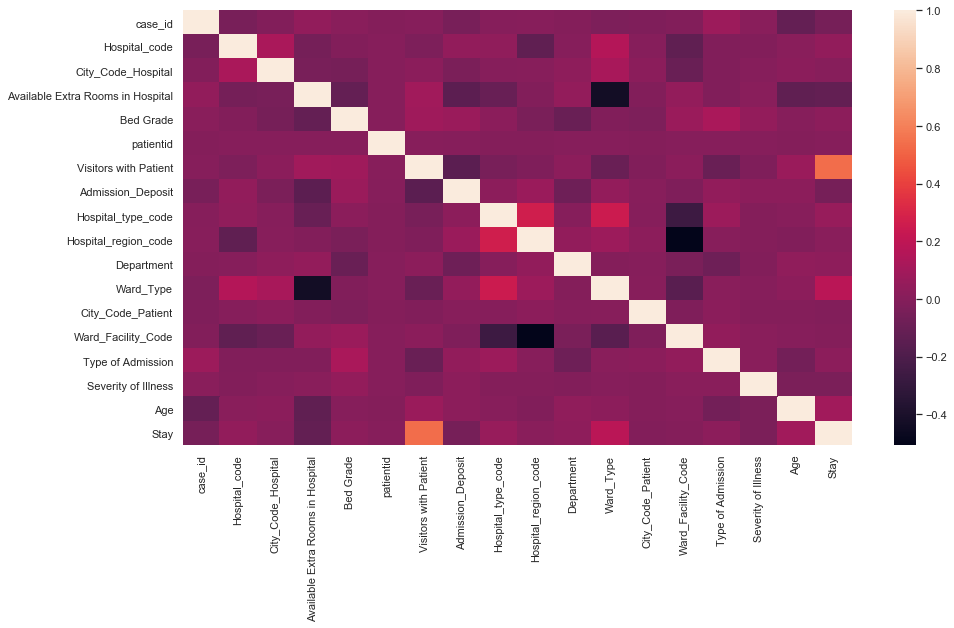

In [44]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data_transformed.corr())

In [45]:
train_data_transformed.describe()


,case_id,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,Visitors with Patient,Admission_Deposit,Hospital_type_code,Hospital_region_code,Department,Ward_Type,City_Code_Patient,Ward_Facility_Code,Type of Admission,Severity of Illness,Age,Stay
count,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.624875,65747.579472,3.284099,4880.749392,1.256841,0.778098,1.943779,1.888575,-7.069087,3.286913,0.782768,1.374076,4.127777,2.698550
std,91925.276847,8.633755,3.102535,1.168171,0.874391,37979.936440,1.764061,1086.776254,1.535712,0.752527,0.561245,0.804655,119.279633,1.688050,0.688957,0.768377,1.889567,2.150075
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1800.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,2.000000,4186.000000,0.000000,0.000000,2.000000,1.000000,4.000000,2.000000,0.000000,1.000000,3.000000,1.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,3.000000,4741.000000,1.000000,1.000000,2.000000,2.000000,8.000000,4.000000,1.000000,2.000000,4.000000,2.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,4.000000,5409.000000,2.000000,1.000000,2.000000,2.000000,8.000000,5.000000,1.000000,2.000000,5.000000,3.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,32.000000,11008.000000,6.000000,2.000000,4.000000,5.000000,38.000000,5.000000,2.000000,2.000000,9.000000,10.000000


# Creating Traing, test , and Validation Splits

In [46]:
valid_fraction = 0.05
valid_size = int(len(train_data_transformed) * valid_fraction)

train = train_data_transformed[:-2 * valid_size]
valid = train_data_transformed[-2 * valid_size:-valid_size]
test = train_data_transformed[-valid_size:]



In [47]:
#!pip install lightgbm

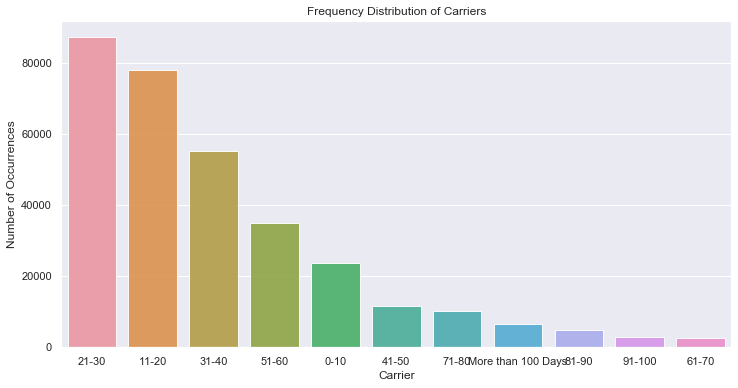

<Figure size 1440x576 with 0 Axes>

In [48]:
carrier_count = train_data['Stay'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.figure(figsize=(20,8))
plt.show()

In [49]:
import lightgbm as lgb
from sklearn import preprocessing
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
import seaborn as sns
from collections import Counter

feature_cols = train.columns.drop('Stay')

# dtrain = lgb.Dataset(train[feature_cols], label=train['Stay'])
# dvalid = lgb.Dataset(valid[feature_cols], label=valid['Stay'])

#param = {'num_leaves': 64, 'objective': 'multiclass'}
params = {}
params['learning_rate'] = 0.03
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.12, 1: 0.38, 2: 0.42, 3: 0.27, 4: 0.07, 5: 0.18, 6: 0.02, 7: 0.06, 8: 0.03, 9: 0.02, 10: 0.04}



clf = lgb.LGBMClassifier(**params)
clf.fit(train[feature_cols], train['Stay'], early_stopping_rounds=100, eval_set=[(valid[feature_cols], valid['Stay']),
        (test[feature_cols], test['Stay'])], eval_metric='multi_error', verbose=True)

eval_score = accuracy_score(test['Stay'], clf.predict(test[feature_cols]))

print('Eval ACC: {}'.format(eval_score))



[1]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.8782	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.84411
Training until validation scores don't improve for 100 rounds
[2]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.86792	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.8358
[3]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.85782	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.82727
[4]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.85039	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.821
[5]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.84194	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.81337
[6]	valid_0's multi_error: 0.747064	valid_0's multi_logloss: 1.83621	valid_1's multi_error: 0.739212	valid_1's multi_logloss: 1.80788
[7]	valid_0's multi_error: 0.746938	valid_0's multi_logloss: 1.82947	valid_1's multi_error: 0.738773	valid_1's multi_logloss: 1.80151
[8]	

[62]	valid_0's multi_error: 0.613466	valid_0's multi_logloss: 1.65172	valid_1's multi_error: 0.623076	valid_1's multi_logloss: 1.63835
[63]	valid_0's multi_error: 0.612085	valid_0's multi_logloss: 1.64998	valid_1's multi_error: 0.622951	valid_1's multi_logloss: 1.63671
[64]	valid_0's multi_error: 0.612587	valid_0's multi_logloss: 1.64839	valid_1's multi_error: 0.622511	valid_1's multi_logloss: 1.63517
[65]	valid_0's multi_error: 0.612022	valid_0's multi_logloss: 1.64678	valid_1's multi_error: 0.621695	valid_1's multi_logloss: 1.63374
[66]	valid_0's multi_error: 0.611582	valid_0's multi_logloss: 1.64531	valid_1's multi_error: 0.621883	valid_1's multi_logloss: 1.63238
[67]	valid_0's multi_error: 0.611582	valid_0's multi_logloss: 1.64385	valid_1's multi_error: 0.620501	valid_1's multi_logloss: 1.63102
[68]	valid_0's multi_error: 0.611519	valid_0's multi_logloss: 1.6428	valid_1's multi_error: 0.621695	valid_1's multi_logloss: 1.63
[69]	valid_0's multi_error: 0.611143	valid_0's multi_loglos

[123]	valid_0's multi_error: 0.607688	valid_0's multi_logloss: 1.59292	valid_1's multi_error: 0.616042	valid_1's multi_logloss: 1.58233
[124]	valid_0's multi_error: 0.606997	valid_0's multi_logloss: 1.59238	valid_1's multi_error: 0.61623	valid_1's multi_logloss: 1.58183
[125]	valid_0's multi_error: 0.607311	valid_0's multi_logloss: 1.59189	valid_1's multi_error: 0.616042	valid_1's multi_logloss: 1.58139
[126]	valid_0's multi_error: 0.607248	valid_0's multi_logloss: 1.59125	valid_1's multi_error: 0.615916	valid_1's multi_logloss: 1.58079
[127]	valid_0's multi_error: 0.606746	valid_0's multi_logloss: 1.59079	valid_1's multi_error: 0.615728	valid_1's multi_logloss: 1.58035
[128]	valid_0's multi_error: 0.606495	valid_0's multi_logloss: 1.5903	valid_1's multi_error: 0.615665	valid_1's multi_logloss: 1.57986
[129]	valid_0's multi_error: 0.606432	valid_0's multi_logloss: 1.58969	valid_1's multi_error: 0.615351	valid_1's multi_logloss: 1.57931
[130]	valid_0's multi_error: 0.606181	valid_0's mu

[184]	valid_0's multi_error: 0.603103	valid_0's multi_logloss: 1.57017	valid_1's multi_error: 0.61265	valid_1's multi_logloss: 1.56005
[185]	valid_0's multi_error: 0.6026	valid_0's multi_logloss: 1.56997	valid_1's multi_error: 0.612776	valid_1's multi_logloss: 1.55983
[186]	valid_0's multi_error: 0.602914	valid_0's multi_logloss: 1.56976	valid_1's multi_error: 0.612713	valid_1's multi_logloss: 1.55961
[187]	valid_0's multi_error: 0.60304	valid_0's multi_logloss: 1.56952	valid_1's multi_error: 0.612838	valid_1's multi_logloss: 1.55937
[188]	valid_0's multi_error: 0.602977	valid_0's multi_logloss: 1.56932	valid_1's multi_error: 0.612713	valid_1's multi_logloss: 1.55921
[189]	valid_0's multi_error: 0.603166	valid_0's multi_logloss: 1.5691	valid_1's multi_error: 0.61265	valid_1's multi_logloss: 1.55899
[190]	valid_0's multi_error: 0.603228	valid_0's multi_logloss: 1.56888	valid_1's multi_error: 0.612524	valid_1's multi_logloss: 1.55881
[191]	valid_0's multi_error: 0.603228	valid_0's multi_

[245]	valid_0's multi_error: 0.600025	valid_0's multi_logloss: 1.55911	valid_1's multi_error: 0.61108	valid_1's multi_logloss: 1.54909
[246]	valid_0's multi_error: 0.600214	valid_0's multi_logloss: 1.559	valid_1's multi_error: 0.610389	valid_1's multi_logloss: 1.54896
[247]	valid_0's multi_error: 0.600088	valid_0's multi_logloss: 1.55889	valid_1's multi_error: 0.610263	valid_1's multi_logloss: 1.54881
[248]	valid_0's multi_error: 0.599711	valid_0's multi_logloss: 1.55876	valid_1's multi_error: 0.609886	valid_1's multi_logloss: 1.54867
[249]	valid_0's multi_error: 0.599837	valid_0's multi_logloss: 1.5586	valid_1's multi_error: 0.6102	valid_1's multi_logloss: 1.54853
[250]	valid_0's multi_error: 0.600088	valid_0's multi_logloss: 1.55849	valid_1's multi_error: 0.610012	valid_1's multi_logloss: 1.54839
[251]	valid_0's multi_error: 0.5999	valid_0's multi_logloss: 1.55835	valid_1's multi_error: 0.610138	valid_1's multi_logloss: 1.54825
[252]	valid_0's multi_error: 0.600088	valid_0's multi_lo

[306]	valid_0's multi_error: 0.59902	valid_0's multi_logloss: 1.55239	valid_1's multi_error: 0.607185	valid_1's multi_logloss: 1.54204
[307]	valid_0's multi_error: 0.599083	valid_0's multi_logloss: 1.55233	valid_1's multi_error: 0.60706	valid_1's multi_logloss: 1.54198
[308]	valid_0's multi_error: 0.598957	valid_0's multi_logloss: 1.55226	valid_1's multi_error: 0.607185	valid_1's multi_logloss: 1.54192
[309]	valid_0's multi_error: 0.598895	valid_0's multi_logloss: 1.55221	valid_1's multi_error: 0.606871	valid_1's multi_logloss: 1.54183
[310]	valid_0's multi_error: 0.598895	valid_0's multi_logloss: 1.55211	valid_1's multi_error: 0.60706	valid_1's multi_logloss: 1.54171
[311]	valid_0's multi_error: 0.598957	valid_0's multi_logloss: 1.55204	valid_1's multi_error: 0.606871	valid_1's multi_logloss: 1.54165
[312]	valid_0's multi_error: 0.59902	valid_0's multi_logloss: 1.55197	valid_1's multi_error: 0.606809	valid_1's multi_logloss: 1.5416
[313]	valid_0's multi_error: 0.599083	valid_0's multi

[367]	valid_0's multi_error: 0.596947	valid_0's multi_logloss: 1.54825	valid_1's multi_error: 0.606934	valid_1's multi_logloss: 1.53775
[368]	valid_0's multi_error: 0.597073	valid_0's multi_logloss: 1.54818	valid_1's multi_error: 0.606934	valid_1's multi_logloss: 1.53767
[369]	valid_0's multi_error: 0.59701	valid_0's multi_logloss: 1.54816	valid_1's multi_error: 0.606809	valid_1's multi_logloss: 1.53764
[370]	valid_0's multi_error: 0.596759	valid_0's multi_logloss: 1.54803	valid_1's multi_error: 0.606997	valid_1's multi_logloss: 1.53751
[371]	valid_0's multi_error: 0.596822	valid_0's multi_logloss: 1.54796	valid_1's multi_error: 0.606934	valid_1's multi_logloss: 1.53745
[372]	valid_0's multi_error: 0.596822	valid_0's multi_logloss: 1.54791	valid_1's multi_error: 0.606871	valid_1's multi_logloss: 1.5374
[373]	valid_0's multi_error: 0.596947	valid_0's multi_logloss: 1.54783	valid_1's multi_error: 0.606997	valid_1's multi_logloss: 1.53733
[374]	valid_0's multi_error: 0.596633	valid_0's mu

[428]	valid_0's multi_error: 0.596257	valid_0's multi_logloss: 1.54505	valid_1's multi_error: 0.60549	valid_1's multi_logloss: 1.53487
[429]	valid_0's multi_error: 0.596257	valid_0's multi_logloss: 1.54503	valid_1's multi_error: 0.605615	valid_1's multi_logloss: 1.53481
[430]	valid_0's multi_error: 0.596131	valid_0's multi_logloss: 1.54495	valid_1's multi_error: 0.60549	valid_1's multi_logloss: 1.53477
[431]	valid_0's multi_error: 0.596005	valid_0's multi_logloss: 1.54491	valid_1's multi_error: 0.605427	valid_1's multi_logloss: 1.53474
[432]	valid_0's multi_error: 0.596068	valid_0's multi_logloss: 1.54487	valid_1's multi_error: 0.605804	valid_1's multi_logloss: 1.5347
[433]	valid_0's multi_error: 0.59588	valid_0's multi_logloss: 1.54483	valid_1's multi_error: 0.605992	valid_1's multi_logloss: 1.53466
[434]	valid_0's multi_error: 0.595691	valid_0's multi_logloss: 1.5448	valid_1's multi_error: 0.605741	valid_1's multi_logloss: 1.53464
[435]	valid_0's multi_error: 0.595754	valid_0's multi

[489]	valid_0's multi_error: 0.594247	valid_0's multi_logloss: 1.54286	valid_1's multi_error: 0.604987	valid_1's multi_logloss: 1.53281
[490]	valid_0's multi_error: 0.594372	valid_0's multi_logloss: 1.54283	valid_1's multi_error: 0.604924	valid_1's multi_logloss: 1.53279
[491]	valid_0's multi_error: 0.594498	valid_0's multi_logloss: 1.5428	valid_1's multi_error: 0.605113	valid_1's multi_logloss: 1.53277
[492]	valid_0's multi_error: 0.594309	valid_0's multi_logloss: 1.54279	valid_1's multi_error: 0.605427	valid_1's multi_logloss: 1.53273
[493]	valid_0's multi_error: 0.594309	valid_0's multi_logloss: 1.54276	valid_1's multi_error: 0.605427	valid_1's multi_logloss: 1.53273
[494]	valid_0's multi_error: 0.594121	valid_0's multi_logloss: 1.54273	valid_1's multi_error: 0.605364	valid_1's multi_logloss: 1.53274
[495]	valid_0's multi_error: 0.594121	valid_0's multi_logloss: 1.54269	valid_1's multi_error: 0.605364	valid_1's multi_logloss: 1.53271
[496]	valid_0's multi_error: 0.594309	valid_0's m

[550]	valid_0's multi_error: 0.593681	valid_0's multi_logloss: 1.5414	valid_1's multi_error: 0.603354	valid_1's multi_logloss: 1.53148
[551]	valid_0's multi_error: 0.593807	valid_0's multi_logloss: 1.54138	valid_1's multi_error: 0.603291	valid_1's multi_logloss: 1.53147
[552]	valid_0's multi_error: 0.593807	valid_0's multi_logloss: 1.54134	valid_1's multi_error: 0.603291	valid_1's multi_logloss: 1.53146
[553]	valid_0's multi_error: 0.593744	valid_0's multi_logloss: 1.54133	valid_1's multi_error: 0.603354	valid_1's multi_logloss: 1.53146
[554]	valid_0's multi_error: 0.593681	valid_0's multi_logloss: 1.54133	valid_1's multi_error: 0.603228	valid_1's multi_logloss: 1.53145
[555]	valid_0's multi_error: 0.593681	valid_0's multi_logloss: 1.54135	valid_1's multi_error: 0.603103	valid_1's multi_logloss: 1.53143
[556]	valid_0's multi_error: 0.593681	valid_0's multi_logloss: 1.54135	valid_1's multi_error: 0.603103	valid_1's multi_logloss: 1.53142
[557]	valid_0's multi_error: 0.593681	valid_0's m

[611]	valid_0's multi_error: 0.593304	valid_0's multi_logloss: 1.54065	valid_1's multi_error: 0.602977	valid_1's multi_logloss: 1.53077
[612]	valid_0's multi_error: 0.593242	valid_0's multi_logloss: 1.54066	valid_1's multi_error: 0.602852	valid_1's multi_logloss: 1.53077
[613]	valid_0's multi_error: 0.593367	valid_0's multi_logloss: 1.54065	valid_1's multi_error: 0.602977	valid_1's multi_logloss: 1.53078
[614]	valid_0's multi_error: 0.593681	valid_0's multi_logloss: 1.54065	valid_1's multi_error: 0.603291	valid_1's multi_logloss: 1.53076
[615]	valid_0's multi_error: 0.593556	valid_0's multi_logloss: 1.54064	valid_1's multi_error: 0.603417	valid_1's multi_logloss: 1.53074
[616]	valid_0's multi_error: 0.593493	valid_0's multi_logloss: 1.54062	valid_1's multi_error: 0.60348	valid_1's multi_logloss: 1.53075
[617]	valid_0's multi_error: 0.593681	valid_0's multi_logloss: 1.54059	valid_1's multi_error: 0.603794	valid_1's multi_logloss: 1.53073
[618]	valid_0's multi_error: 0.593618	valid_0's m

In [50]:

preds = clf.predict(test_data_transformed[feature_cols])

Counter(train['Stay'])

Counter({0: 20045,
         4: 10481,
         3: 50319,
         1: 68724,
         5: 32434,
         2: 79312,
         7: 9490,
         10: 6172,
         8: 4524,
         6: 2496,
         9: 2599})

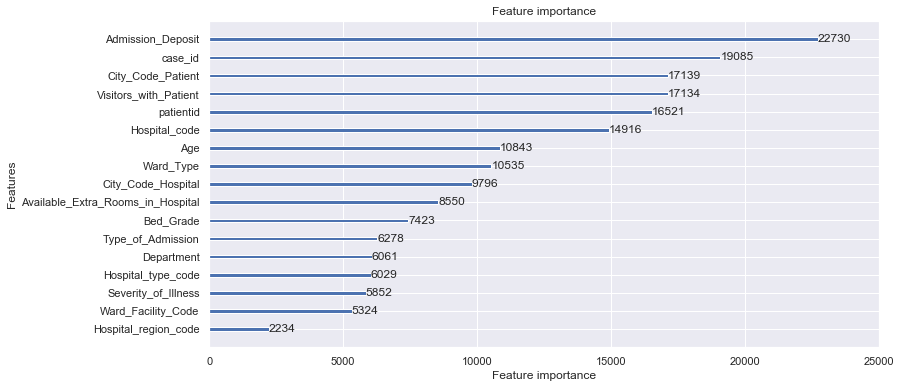

In [51]:
Counter(preds)
submission = pd.DataFrame({'case_id':test_data['case_id'], 'Stay':preds})


plt.rcParams['figure.figsize'] = (12, 6)
lgb.plot_importance(clf)
plt.show()

In [52]:
print(train_data['Stay'].unique())
print(submission['Stay'].unique())

['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
[ 0  5  2  1  3 10  8  7  9  4]


In [53]:
submission

#"0": '0-10, "1": "11-20", "2": "21-30", "3": "31-40", "4": "41-50", "5": "51-60", "6": "61-70" , "7": "71-80", "8": "81-90", "9": "91-100", "10": "More than 100 Days"

submission["Stay"].replace({0: "0-10", 1: "11-20", 2: "21-30", 3: "31-40", 4: "41-50", 5: "51-60", 6: "61-70" , 7: "71-80", 8: "81-90", 9: "91-100", 10: "More than 100 Days"}, inplace=True)



In [54]:
submission.to_csv('submission.csv', index=False)